In [1]:
# Amazon Electronics Ratings - Sentiment Analysis

In [2]:
# Step 1: Libraries Import
# Restart-style cleanup before running charts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Clear any previous plots
plt.close('all')

import warnings
warnings.filterwarnings("ignore")


In [3]:

# Step 2: Load Dataset
data = pd.read_csv(
    r"C:\Users\ASUS\Desktop\project\amazon_ratings_Electronics .csv\ratings_Electronics.csv", 
    names=["userId", "productId", "rating", "timestamp"]
)


In [4]:
# Step 3: First Look at Data
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
           userId   productId  rating   timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


In [5]:
# Step 4: Dataset Shape
print("\nDataset Shape (rows, columns):", data.shape)


Dataset Shape (rows, columns): (7824482, 4)


In [6]:
# Step 5: Data Types
print("\nData Types:")
print(data.dtypes)


Data Types:
userId        object
productId     object
rating       float64
timestamp      int64
dtype: object


In [7]:
# Step 6: Missing Values Check
print("\nMissing Values in each column:")
print(data.isnull().sum())


Missing Values in each column:
userId       0
productId    0
rating       0
timestamp    0
dtype: int64


In [8]:
# Step 7: Unique Values Check
print("\nUnique values in each column:")
print(data.nunique())


Unique values in each column:
userId       4201696
productId     476002
rating             5
timestamp       5489
dtype: int64


In [9]:
# Step 8: Rating Value Counts
print("\nRating counts:")
print(data['rating'].value_counts())


Rating counts:
rating
5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: count, dtype: int64


In [10]:
# Step 9: Sentiment Mapping
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['rating'].apply(rating_to_sentiment)

print("\nSentiment column added:")
print(data.head())


Sentiment column added:
           userId   productId  rating   timestamp Sentiment
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200  Positive
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800  Positive
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600  Negative
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200   Neutral
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200  Negative


In [11]:
# Step 10: Sentiment Counts
print("\nSentiment counts:")
print(data['Sentiment'].value_counts())


Sentiment counts:
Sentiment
Positive    5833322
Negative    1358087
Neutral      633073
Name: count, dtype: int64


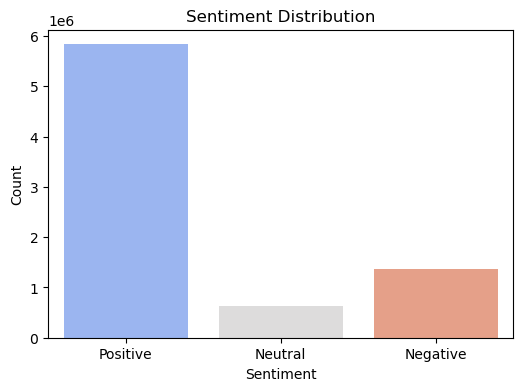

In [12]:
# Step 11: Visualization - Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=data, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

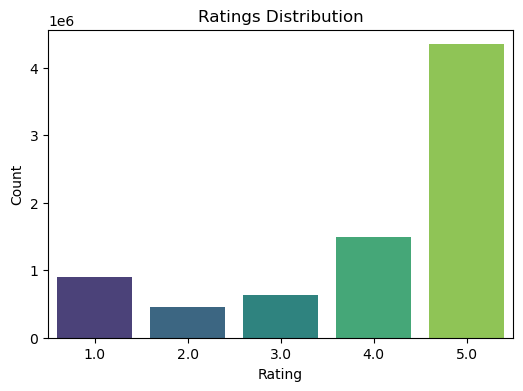

In [13]:
# Step 12: Visualization - Ratings Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

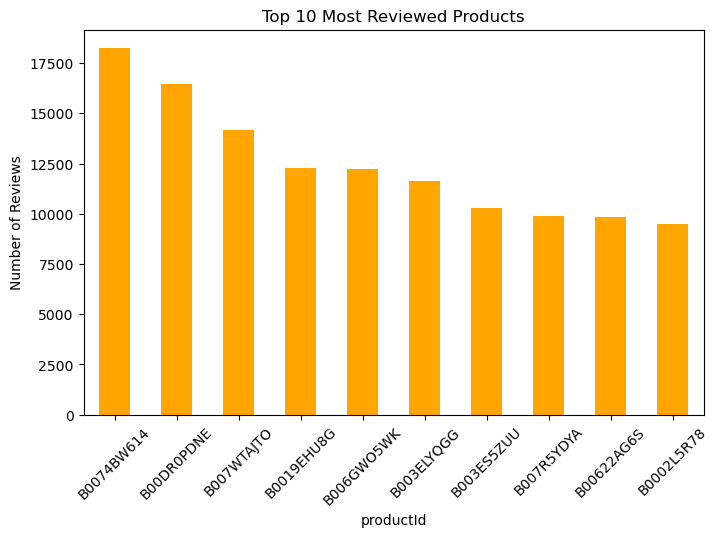

In [14]:
# Step 13: Top 10 Most Reviewed Products
top_products = data['productId'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_products.plot(kind='bar', color='orange')
plt.title("Top 10 Most Reviewed Products")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

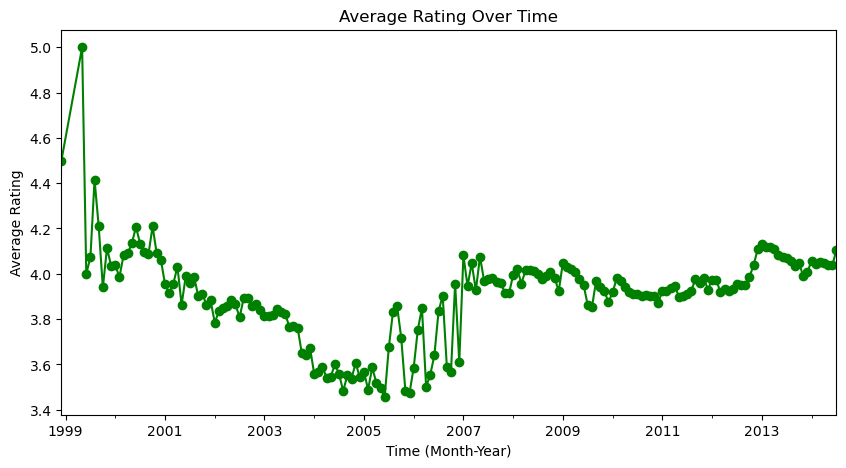

In [15]:
# Step 14: Ratings Over Time
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
ratings_over_time = data.groupby(data['timestamp'].dt.to_period('M'))['rating'].mean()
plt.figure(figsize=(10,5))
ratings_over_time.plot(kind='line', marker='o', color='green')
plt.title("Average Rating Over Time")
plt.xlabel("Time (Month-Year)")
plt.ylabel("Average Rating")
plt.show()

<Figure size 1200x600 with 0 Axes>

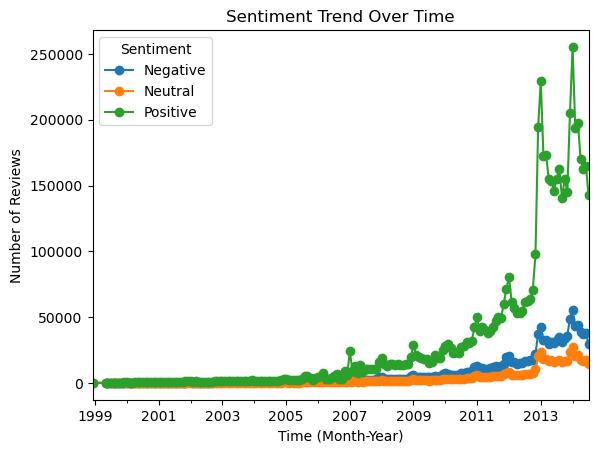

In [16]:
# Step 15: Sentiment Trend Over Time
sentiment_over_time = data.groupby([data['timestamp'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sentiment_over_time.plot(kind='line', marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Time (Month-Year)")
plt.ylabel("Number of Reviews")
plt.show()

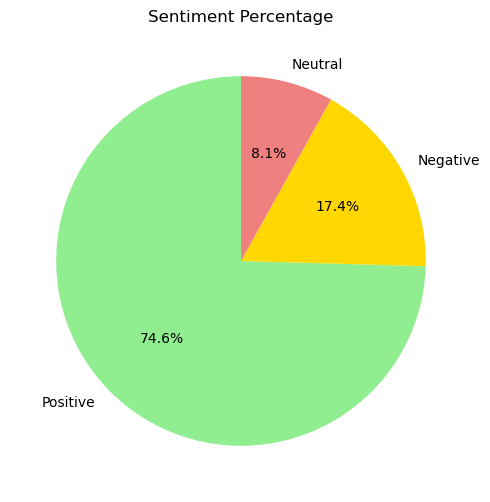

In [17]:
# Extra Visualization 1: Pie Chart for Sentiment %
plt.figure(figsize=(6,6))
data['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['lightgreen', 'gold', 'lightcoral']
)
plt.title("Sentiment Percentage")
plt.ylabel("")
plt.show()

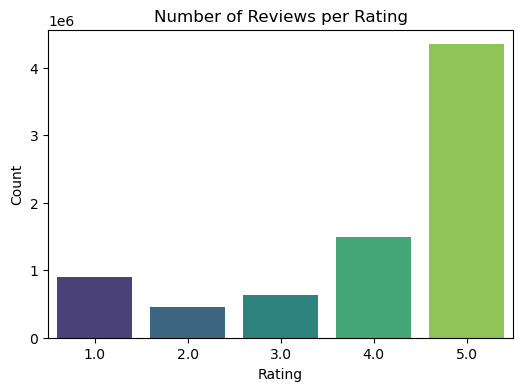

In [18]:
# Extra Visualization 3: Number of Reviews per Rating
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title("Number of Reviews per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

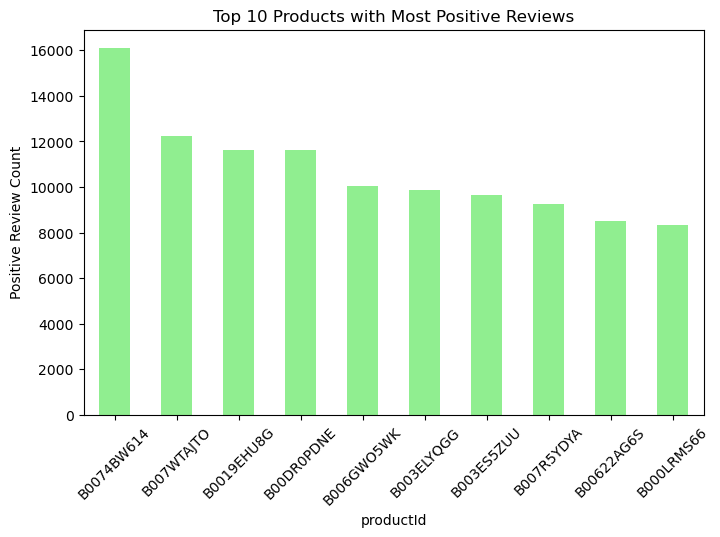

In [19]:
# Extra Visualization 4: Top 10 Products with Highest Positive Reviews
positive_counts = data[data['Sentiment']=='Positive']['productId'].value_counts().head(10)
plt.figure(figsize=(8,5))
positive_counts.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Products with Most Positive Reviews")
plt.ylabel("Positive Review Count")
plt.xticks(rotation=45)
plt.show()

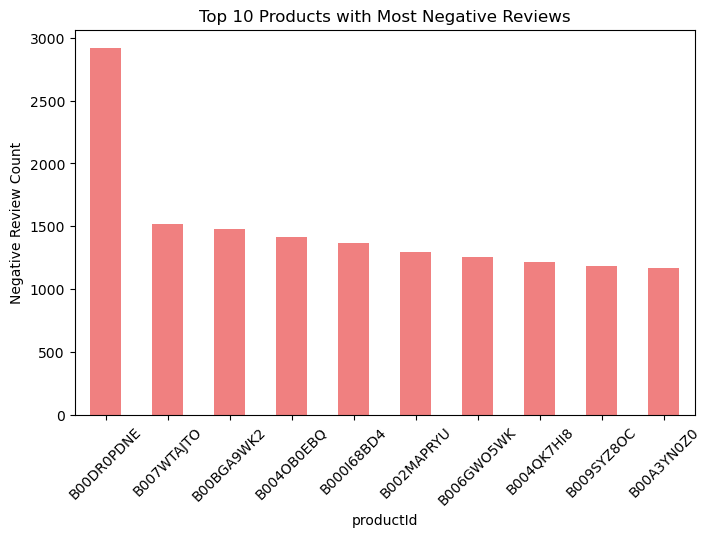

In [20]:
# Extra Visualization 5: Top 10 Products with Highest Negative Reviews
negative_counts = data[data['Sentiment']=='Negative']['productId'].value_counts().head(10)
plt.figure(figsize=(8,5))
negative_counts.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Products with Most Negative Reviews")
plt.ylabel("Negative Review Count")
plt.xticks(rotation=45)
plt.show()

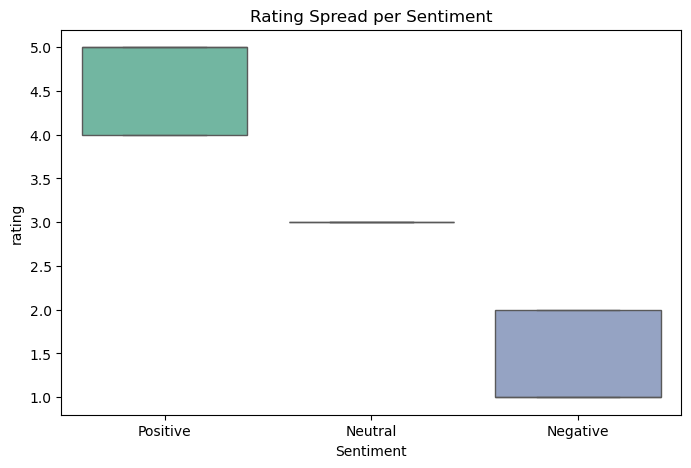

In [21]:
# Extra Visualization 6: Sentiment Ratio per Rating Value
plt.figure(figsize=(8,5))
sns.boxplot(x='Sentiment', y='rating', data=data, order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title("Rating Spread per Sentiment")
plt.show()

In [22]:
# ---------- Overall Stats ----------
print("Total Reviews:", len(data))
print("\nSentiment Counts:")
print(data['Sentiment'].value_counts())

print("\nSentiment Percentage (%):")
print(round(data['Sentiment'].value_counts(normalize=True) * 100, 2))

Total Reviews: 7824482

Sentiment Counts:
Sentiment
Positive    5833322
Negative    1358087
Neutral      633073
Name: count, dtype: int64

Sentiment Percentage (%):
Sentiment
Positive    74.55
Negative    17.36
Neutral      8.09
Name: proportion, dtype: float64


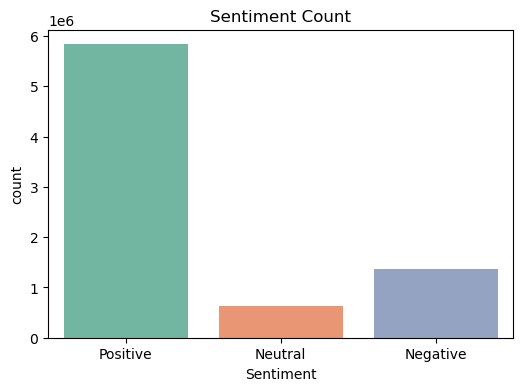

In [23]:
# ---------- Visualization: Sentiment Count ----------
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=data, order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title("Sentiment Count")
plt.show()

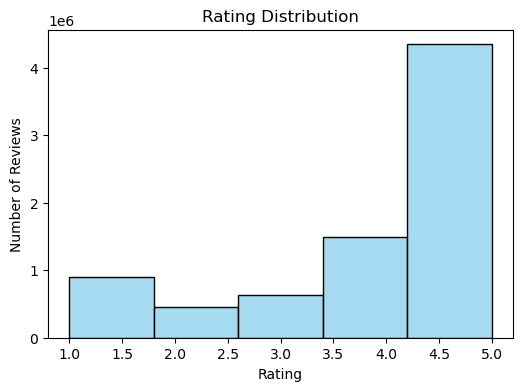

In [24]:
# ---------- Visualization: Rating Distribution ----------
plt.figure(figsize=(6,4))
sns.histplot(data['rating'], bins=5, kde=False, color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

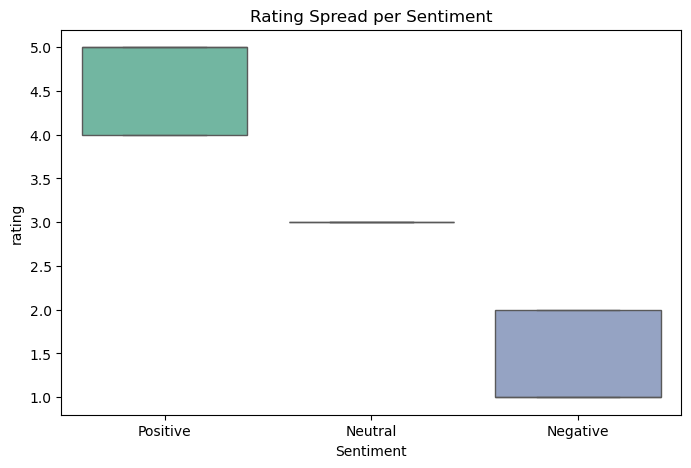

In [25]:
# ---------- Visualization: Rating vs Sentiment ----------
plt.figure(figsize=(8,5))
sns.boxplot(x='Sentiment', y='rating', data=data, order=['Positive', 'Neutral', 'Negative'], palette='Set2')
plt.title("Rating Spread per Sentiment")
plt.show()

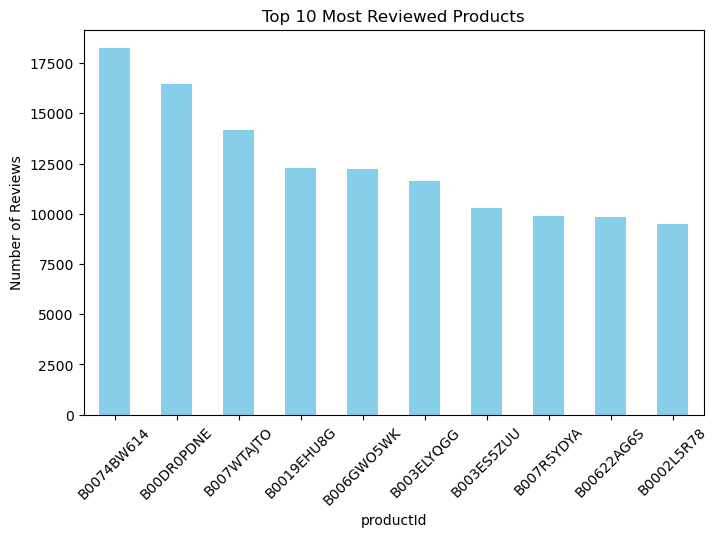

In [26]:
# ---------- Visualization: Top 10 Most Reviewed Products ----------
top_products = data['productId'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Reviewed Products")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [30]:
 # Save Final Dataset with Sentiment
data.to_csv("amazon_ratings_with_sentiment1.csv", index=False)
print("\n Sentiment analysis complete. File saved as amazon_ratings_with_sentiment.csv")


 Sentiment analysis complete. File saved as amazon_ratings_with_sentiment.csv


In [31]:
 # Conclusion
print("\n--- Conclusion ---")
print("1. Majority of ratings are Positive, showing customers are generally satisfied.")
print("2. Negative ratings are fewer, but still present — improvement areas exist.")
print("3. Popular products (most reviewed) generally have high ratings.")
print("4. Average rating over time is stable, indicating consistent product quality.")
print("5. Sentiment analysis based on ratings is reliable in absence of review text.")


--- Conclusion ---
1. Majority of ratings are Positive, showing customers are generally satisfied.
2. Negative ratings are fewer, but still present — improvement areas exist.
3. Popular products (most reviewed) generally have high ratings.
4. Average rating over time is stable, indicating consistent product quality.
5. Sentiment analysis based on ratings is reliable in absence of review text.
